# Notebook de análise exploratória dos dados (EDA)

In [17]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

In [18]:
import pandas as pd
import yfinance as yf
#import pandas_ta as ta

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [19]:
input_path = "C:/Users/wbaldin/Desktop/fase04/Obesity.csv"

df = pd.read_csv(input_path)
df = df.rename_axis('ds').sort_index()
df.tail()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
ds,,,,,,,,,,,,,,,,,
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [20]:
px.histogram(df, x='Gender', )

In [21]:
px.histogram(df, x = 'Gender', text_auto = True, color = 'Obesity', barmode = 'group')

In [36]:
px.histogram(df, x = 'family_history', text_auto = True, color = 'Obesity', barmode = 'group',category_orders={"Obesity": ["Insufficient Weight", "Normal Weight", "Overweight Level I", "Overweight Level II", "Obesity Type I", "Obesity Type II", "Obesity Type III"]}, 
             color_discrete_sequence=px.colors.qualitative.Vivid)

In [23]:
import plotly.express as px
fig = px.histogram(df, x="Obesity", color="Gender",barmode = 'group', text_auto=True, category_orders={"Obesity": ["Insufficient Weight", "Normal Weight", "Overweight Level I", "Overweight Level II", "Obesity Type I", "Obesity Type II", "Obesity Type III"]}, 
                   color_discrete_sequence=px.colors.qualitative.Vivid)
fig.show()

In [24]:
px. histogram(df,x= "Age", text_auto = True, color = 'Obesity', barmode = 'group')

In [26]:
import plotly.express as px
fig = px.histogram(df, x="Obesity", color="MTRANS",barmode = 'group', text_auto=True, category_orders={"Obesity": ["Insufficient Weight", "Normal Weight", "Overweight Level I", "Overweight Level II", "Obesity Type I", "Obesity Type II", "Obesity Type III"]}, )
fig.show()

In [27]:
import plotly.express as px
fig = px.histogram(df, x="Obesity", color="CAEC",barmode = 'group', text_auto=True, category_orders={"Obesity": ["Insufficient Weight", "Normal Weight", "Overweight Level I", "Overweight Level II", "Obesity Type I", "Obesity Type II", "Obesity Type III"]}, )
fig.show()

In [28]:
import plotly.express as px
fig = px.histogram(df, x="Obesity", color="SMOKE",barmode = 'group', text_auto=True, category_orders={"Obesity": ["Insufficient Weight", "Normal Weight", "Overweight Level I", "Overweight Level II", "Obesity Type I", "Obesity Type II", "Obesity Type III"]}, )
fig.show()

In [29]:
import plotly.express as px
fig = px.histogram(df, x="Obesity", color="SCC",barmode = 'group', text_auto=True, category_orders={"Obesity": ["Insufficient Weight", "Normal Weight", "Overweight Level I", "Overweight Level II", "Obesity Type I", "Obesity Type II", "Obesity Type III"]}, )
fig.show()

In [30]:
df_correl = df.drop(columns=['FAVC' ,'family_history', 'FAVC','CAEC','SMOKE','SCC','MTRANS','Gender','CALC','Obesity'])
df_correl.head()
df_correl.dropna(inplace=True)
df_correl.head()


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
ds,,,,,,,,
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0


<Axes: >

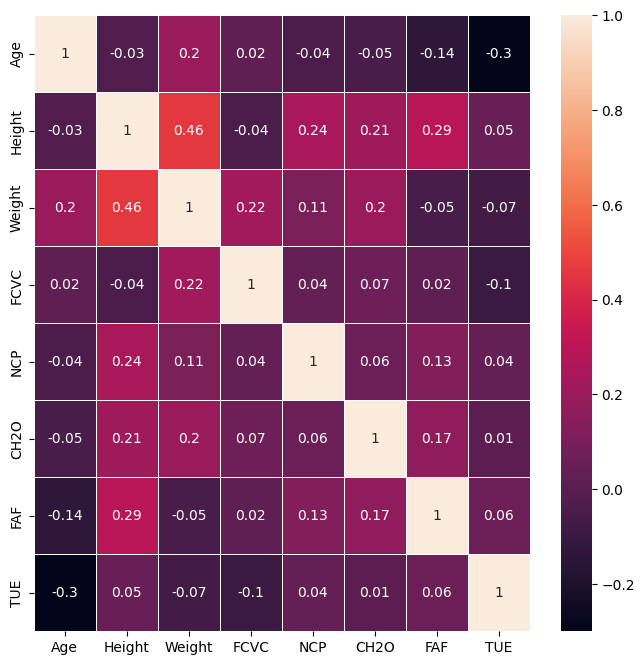

In [31]:
correlation_matrix = df_correl.corr().round(2)
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.7, ax=ax)


In [32]:
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
ds,,,,,,,,,,,,,,,,,
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
